This notebook renders the policy assessment cards. It must be run after [systematic_policy_assessment](systematic_policy_assessment.ipynb).

In [1]:
%reset-f
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from render_pol_assess import *

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline


# Data

In [3]:
xl = pd.ExcelFile("results/derivatives.xlsx")

ders=dict()
for s in xl.sheet_names:
    ders[s]=pd.read_excel("results/derivatives.xlsx", index_col="province", sheetname=s)
ders=pd.concat(ders, names=["out","var"],axis=1).stack("var")
ders.head()

out                      dKtot  dWtot_currency
province var                                  
Abra     T_rebuild_K  0.000000        0.140342
         fap          0.238370        0.645984
         far          0.762266        0.356390
         nat_buyout   0.000000       -0.192106
         pi          -0.235728       -0.237241

# Parameters

In [4]:
#Policy Labels (x axis)
policy_info= pd.read_csv("inputs/policy_description.csv",index_col=0)
policy_descriptions = policy_info.descriptor
policy_descriptions.head()

key
avg_prod_k                    Productivity of capital
axfin_p             Access to finance for poor people
axfin_r         Access to finance for non-poor people
axhealth                        Access to health care
bashs         Births attended by skilled health staff
Name: descriptor, dtype: object

In [5]:
colors = pd.read_csv("inputs/colors_pol_assess.csv", index_col=0)
colors

,color,edgecolor,alpha
dWtot_currency,#a6cee3,#1f78b4,1
dKtot,#cccccc,#969696,1


# actual drawing

Currently working on:  Zamboanga Del Sur


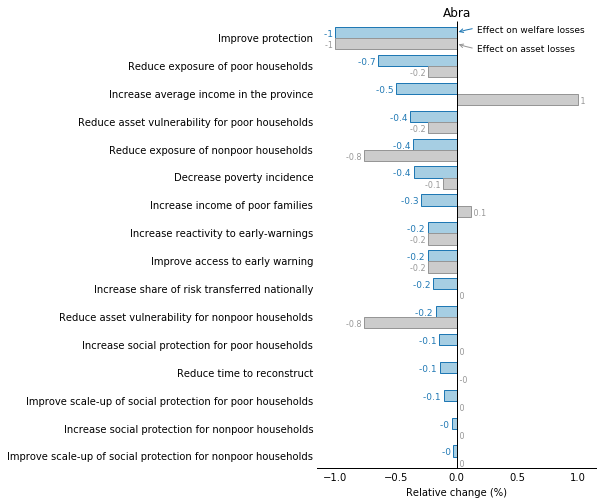

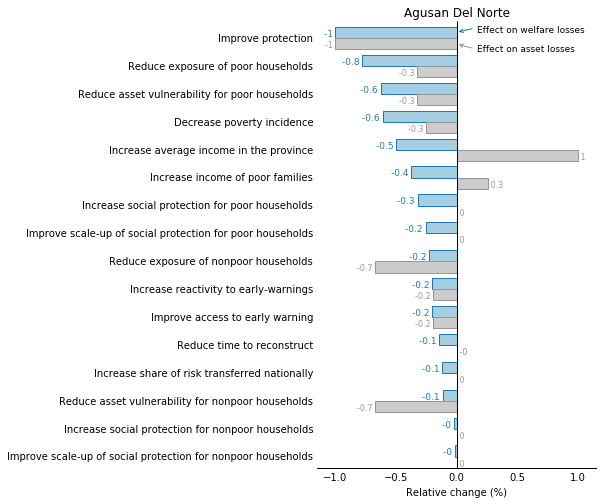

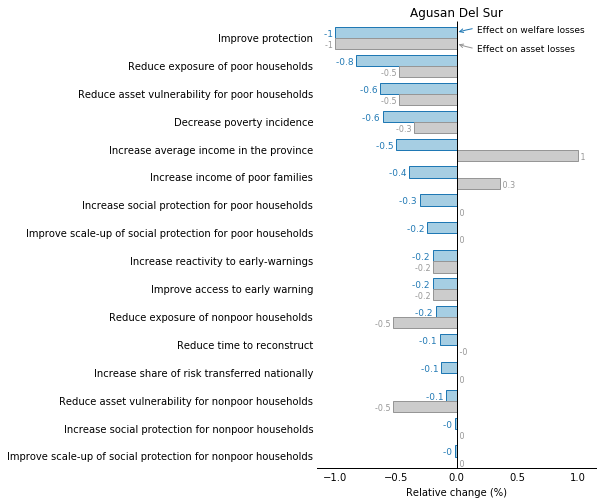

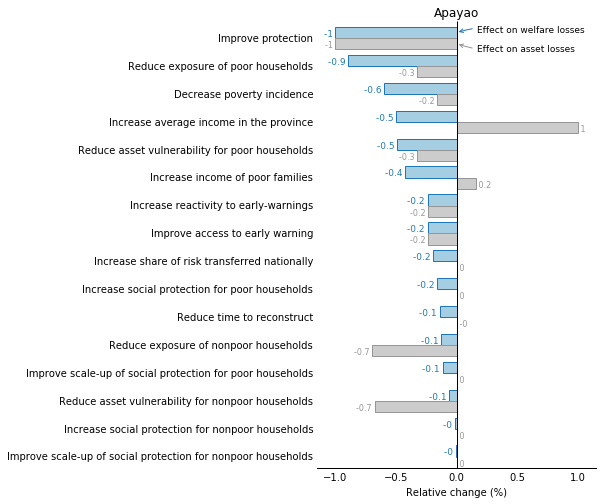

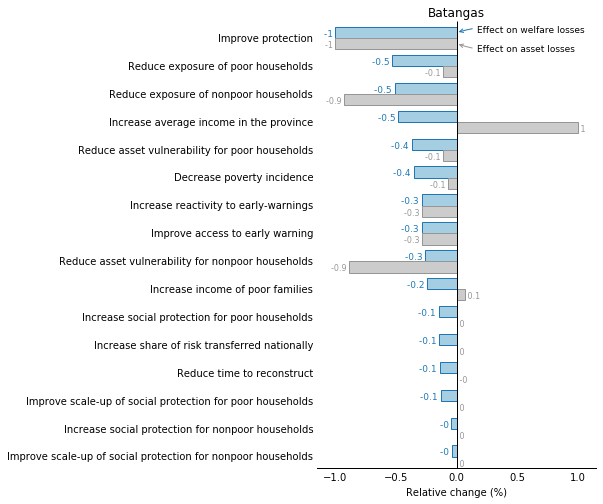

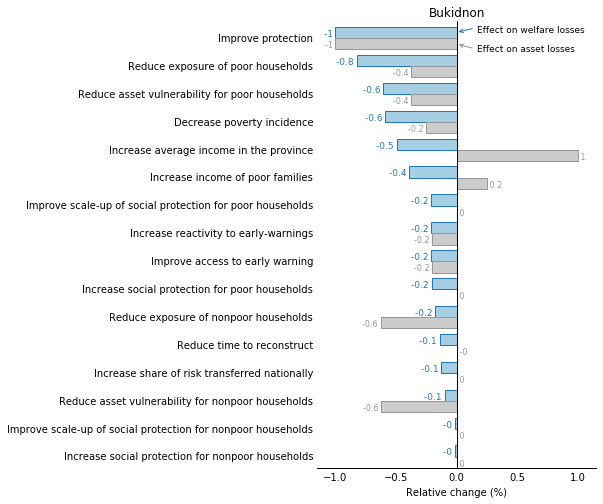

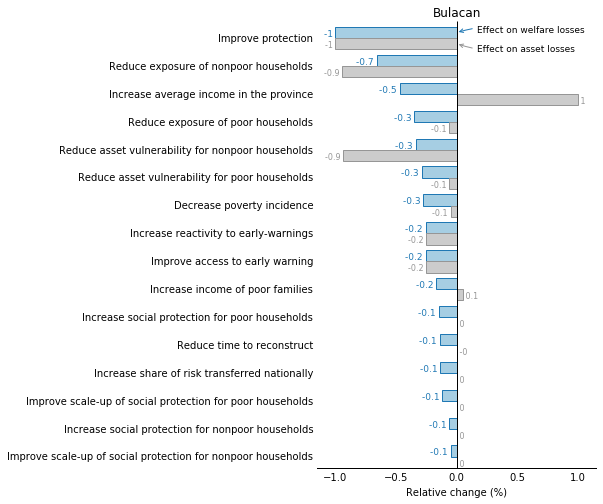

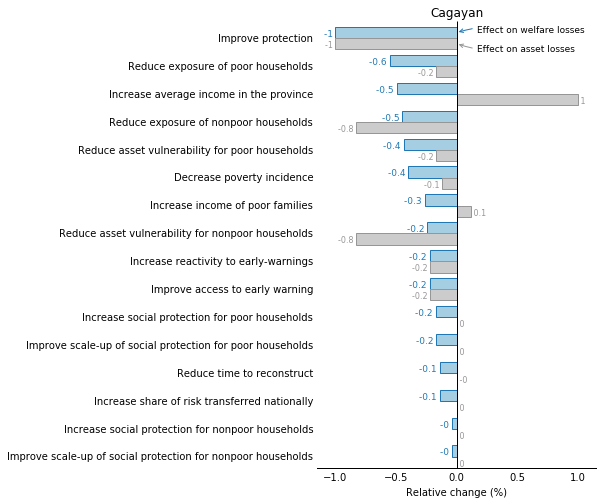

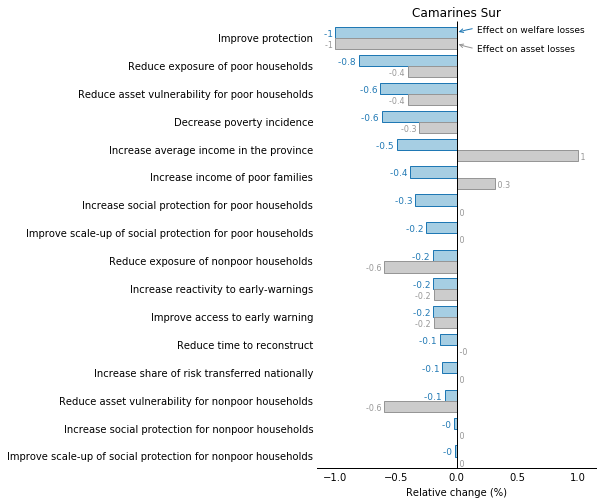

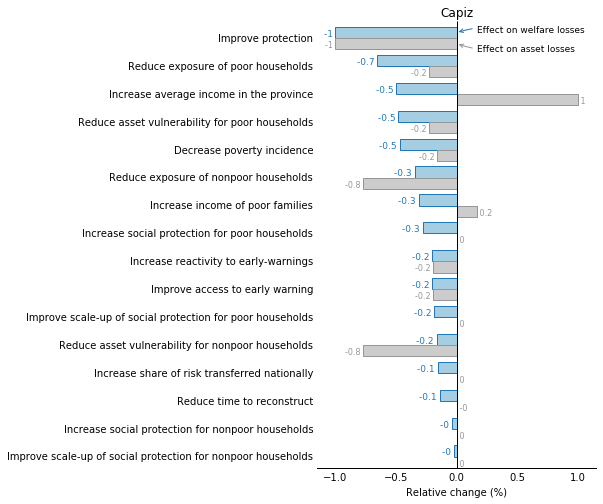

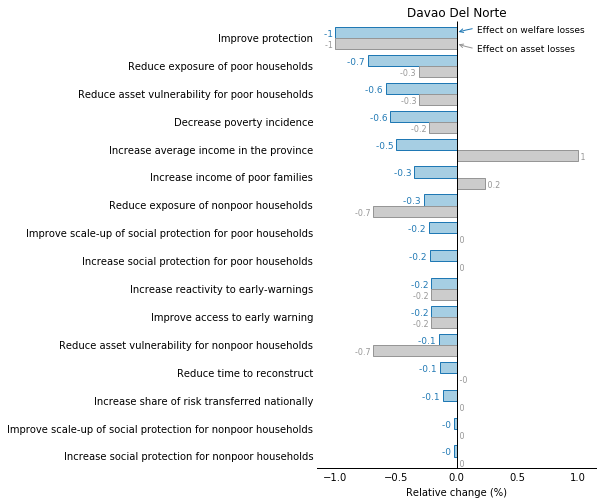

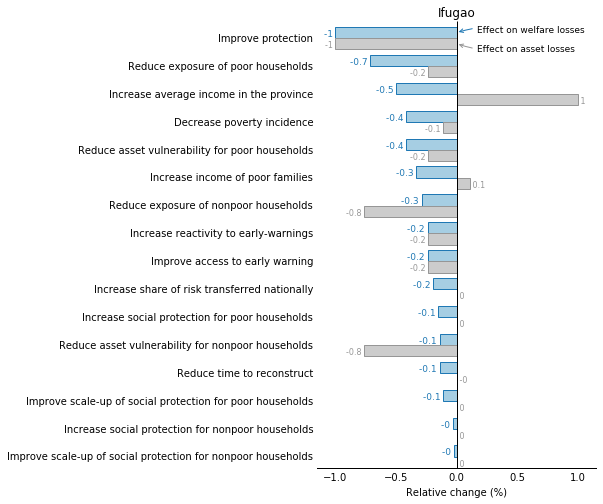

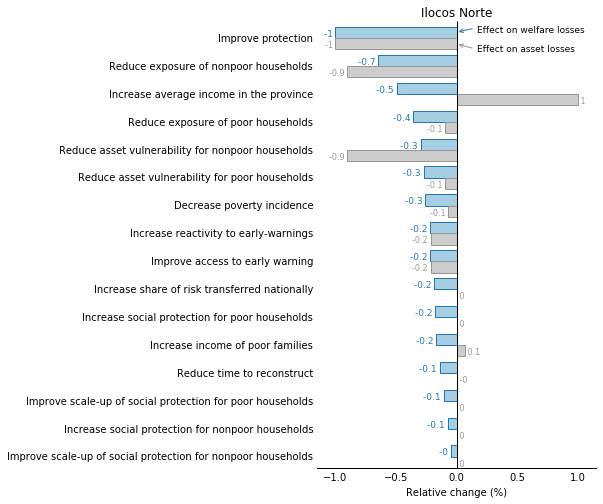

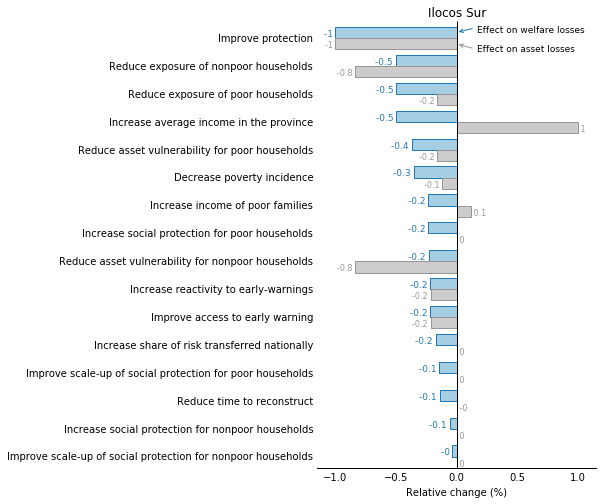

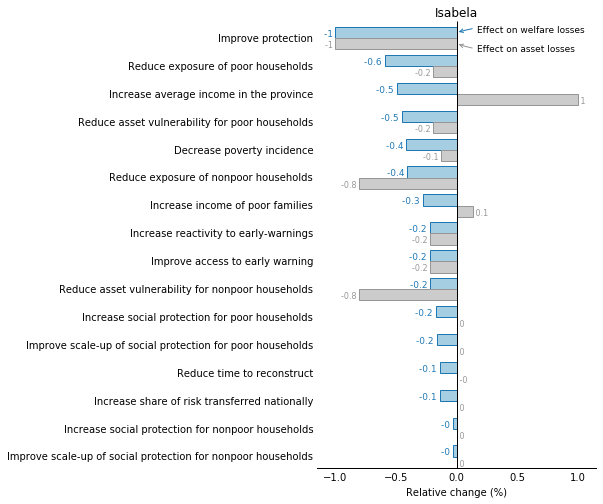

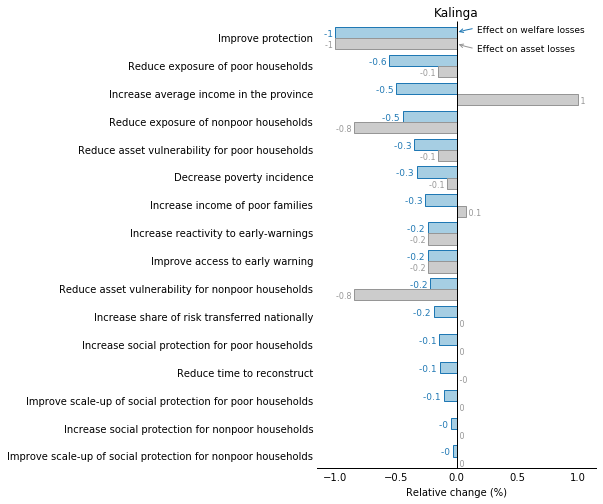

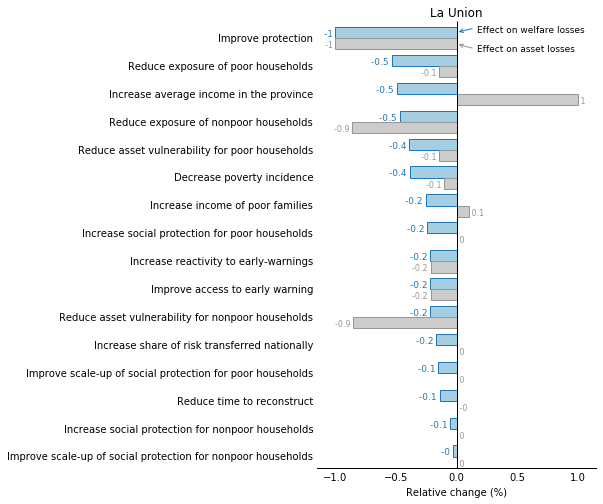

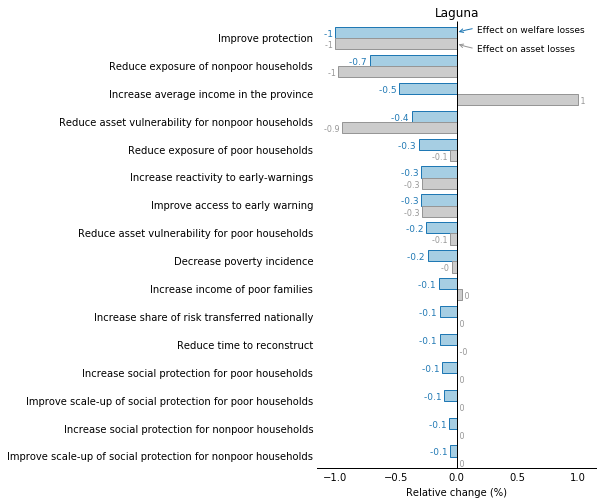

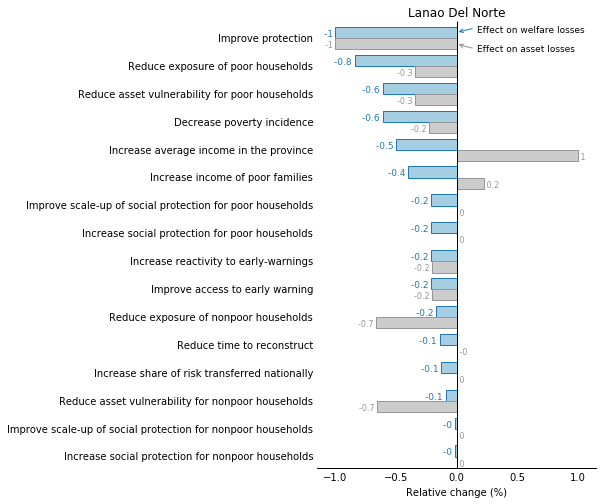

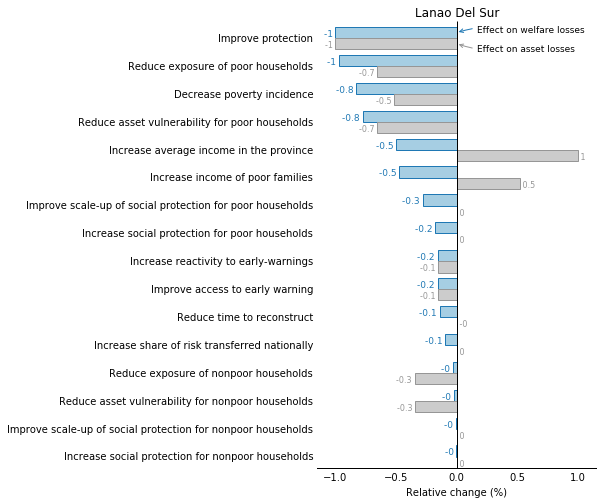

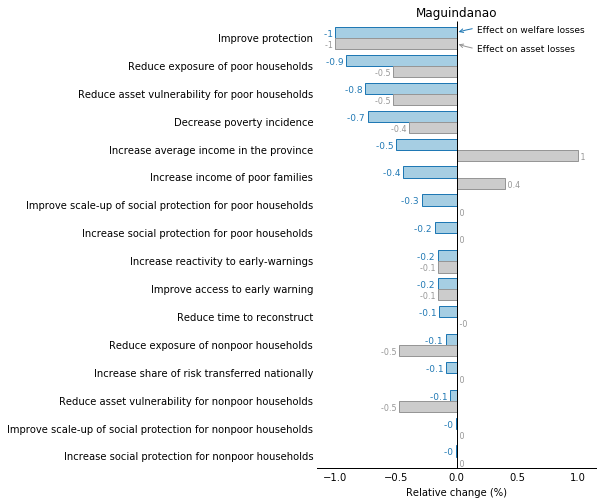

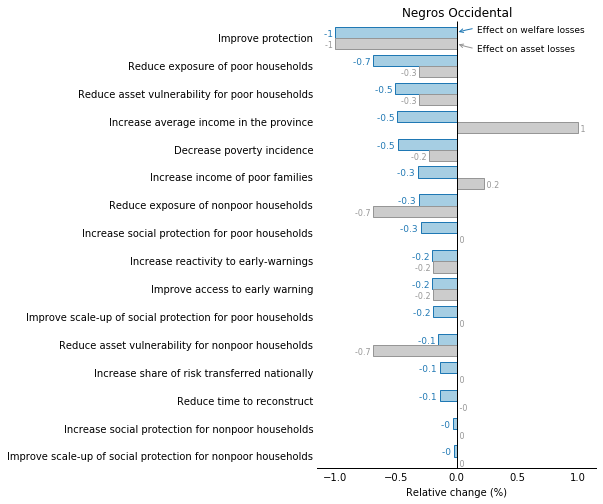

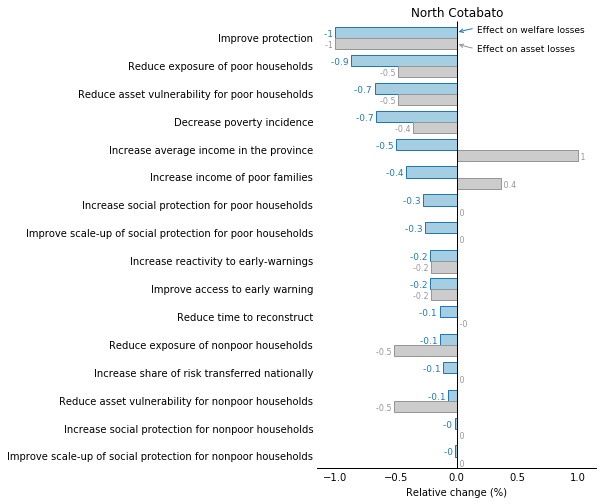

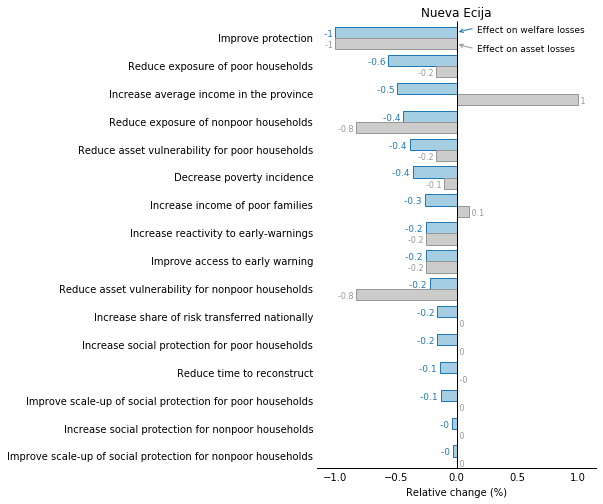

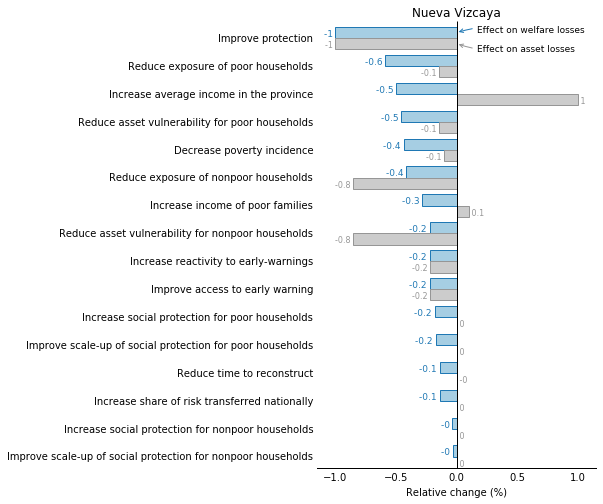

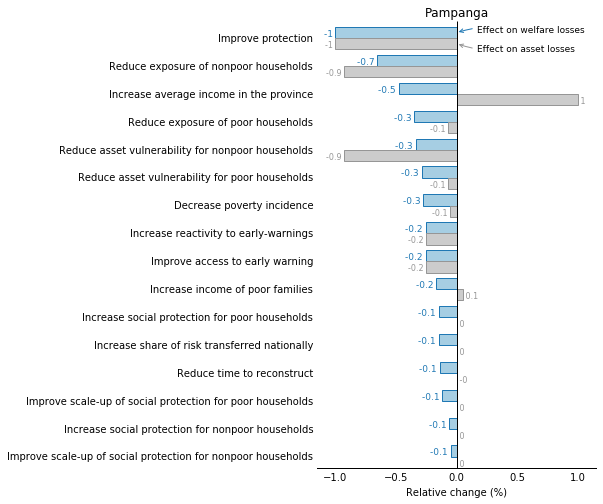

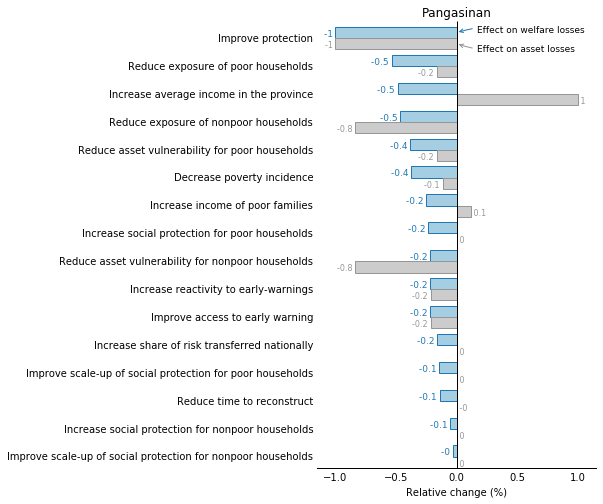

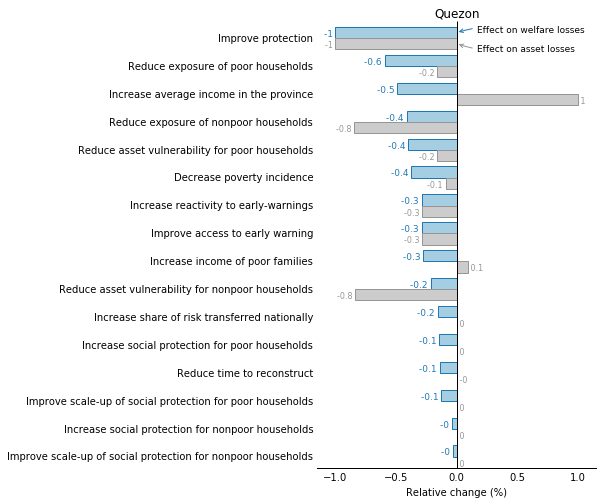

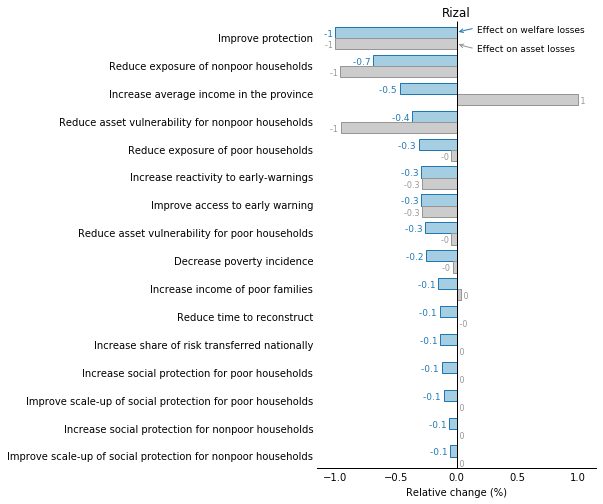

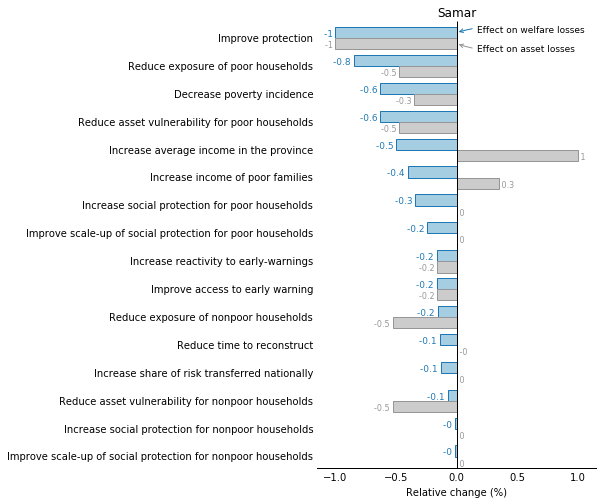

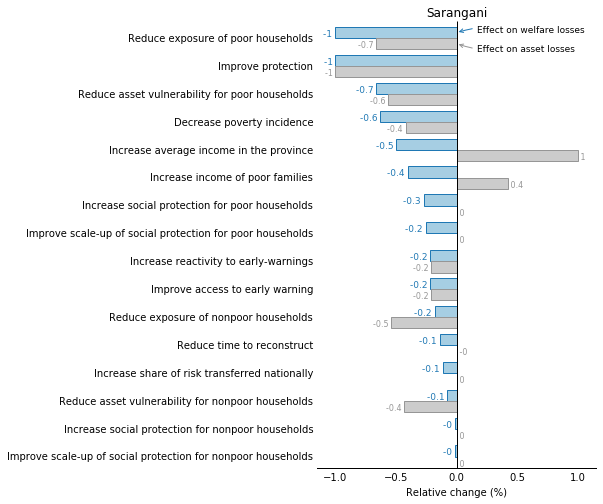

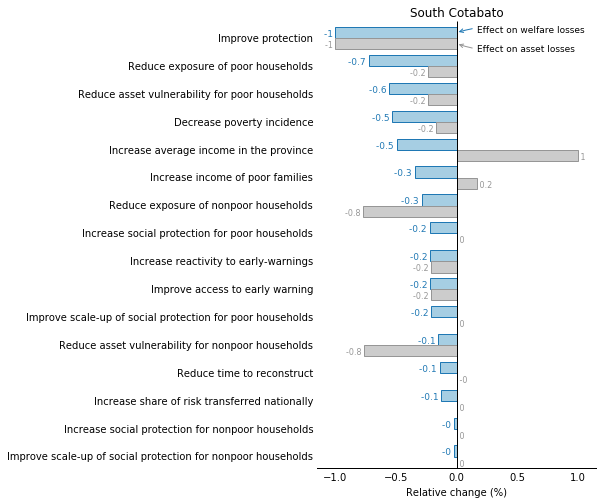

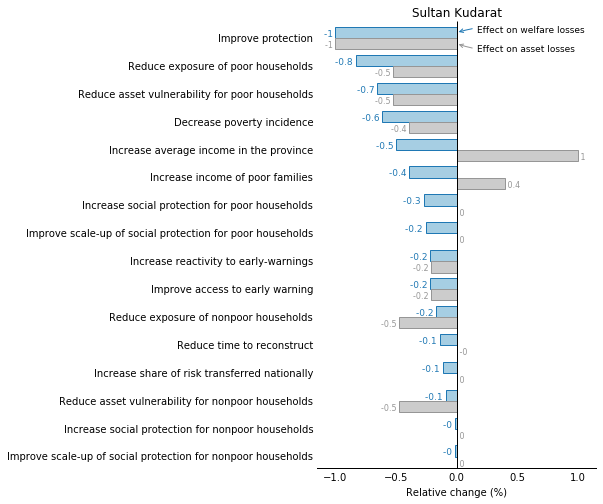

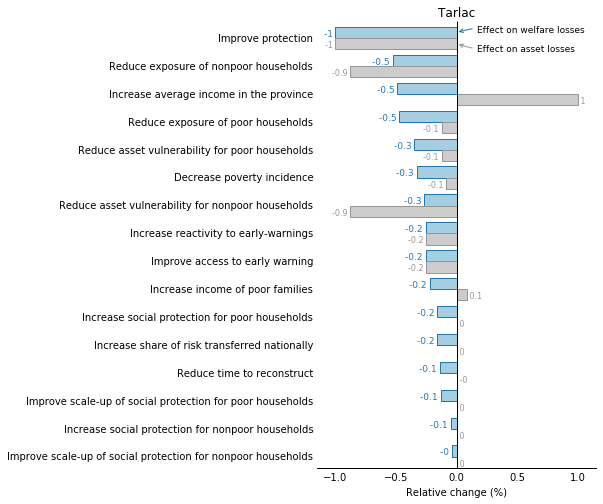

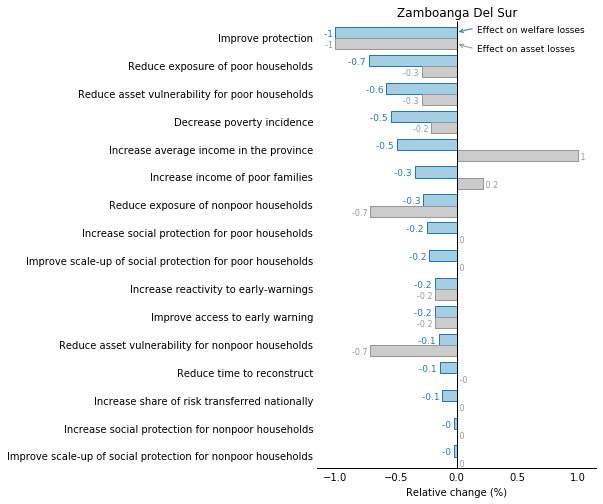

In [6]:
# render_pol_cards(ders,colors,policy_descriptions,["Abra"])
render_pol_cards(ders,colors,policy_descriptions)

### Merge to single pdf

In [8]:
province_list=ders.unstack("var").index.tolist()
merge_cardfiles_files(province_list,"../scorecards.pdf")
   

Merging cards....
Merging cards done
